In [1]:
import solveBSE_fromG46by6

Cluster vectors: [[6. 0.]
 [0. 6.]]
QMC sign: [0.1680536638926722, 0.16970966058067885]
sigma difference: [0.00187997 0.00101488]
Transferred frequency iwm =  0
Transferred momentum q =  [0. 0.]
Index of transferred momentum:  0
Vertex channel =  PARTICLE_PARTICLE_UP_DOWN
Inverse temperature =  5.0
U =  6.0
t-prime =  -0.4
filling =  0.85
actual filling: [0.84780792 0.85015002]
K-vectors:  [[0.         0.        ]
 [0.         1.04719755]
 [0.         2.0943951 ]
 [0.         3.14159265]
 [0.         4.1887902 ]
 [0.         5.23598776]
 [1.04719755 0.        ]
 [1.04719755 1.04719755]
 [1.04719755 2.0943951 ]
 [1.04719755 3.14159265]
 [1.04719755 4.1887902 ]
 [1.04719755 5.23598776]
 [2.0943951  0.        ]
 [2.0943951  1.04719755]
 [2.0943951  2.0943951 ]
 [2.0943951  3.14159265]
 [2.0943951  4.1887902 ]
 [2.0943951  5.23598776]
 [3.14159265 0.        ]
 [3.14159265 1.04719755]
 [3.14159265 2.0943951 ]
 [3.14159265 3.14159265]
 [3.14159265 4.1887902 ]
 [3.14159265 5.23598776]
 [4.188

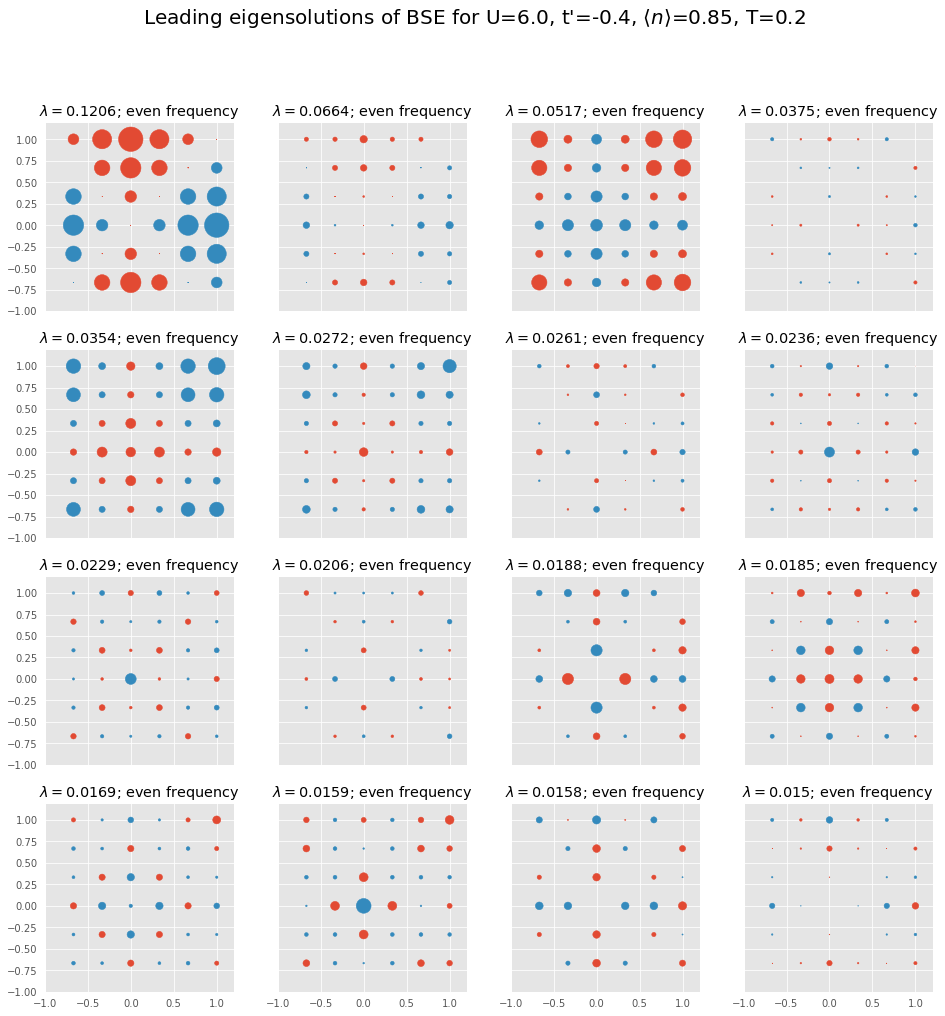

In [2]:
b = solveBSE_fromG46by6.BSE(fileG4="tpsb6by6U6b5tpn4n085pbcw128.hdf5",draw=True,useG0=False,symmetrize_G4=True,phSymmetry=False,calcRedVertex=False,calcCluster=False,nkfine=100,oldFormat=False,shiftedK=False,newMaster=True)

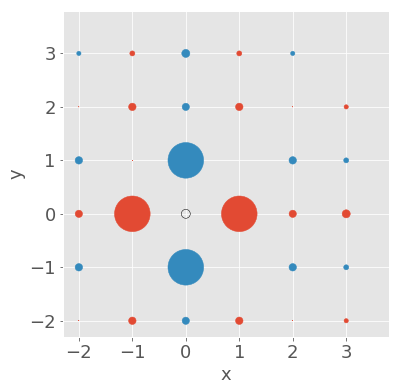

In [3]:
import numpy as np
import math
from numpy import *
import matplotlib.pyplot as mpl
import h5py
import sys
import os
from matplotlib.pyplot import *
import matplotlib as mpll
import symmetrize_Nc6x6

Kvecs = b.Kvecs
Rvecs = Kvecs/Kvecs[1,1]
Nw = b.evecs.shape[0]
iw0=int(Nw/2)
evecskspace = zeros((b.Nc),dtype='complex')
evecsrspace = zeros((b.Nc),dtype='complex')

evecskspace = b.evecs[iw0,:,0]
plotrspace = zeros((b.Nc,3),dtype='double')

for i in range (b.Nc):
    plotrspace[i,0] = Rvecs[i,0]
    plotrspace[i,1] = Rvecs[i,1]
    for k in range (b.Nc):
        evecsrspace[i] += (1 / sqrt(b.Nc)) * evecskspace[k] * exp(-1.0 * 1j * (Kvecs[k,0] * Rvecs[i,0] + Kvecs[k,1] * Rvecs[i,1]))

for i in range (b.Nc):
    plotrspace[i,2] = real(evecsrspace[i])

prop_cycle = rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colVec = b.Nc*[colors[0]]
for ic in range(b.Nc):
    if real(plotrspace[ic,2])*10 < 0.0: colVec[ic] = colors[1]
fig, ax = mpl.subplots(figsize=(6,6))
ax.scatter(plotrspace[:,0], plotrspace[:,1], s=(abs(real(plotrspace[:,2])))*4000, marker='o',c=colVec)
ax.scatter(0, 0, s=80, facecolors='none', edgecolors='k')
#ax.scatter(0, 0, 50, marker='o',c=colors[4])
#ax.scatter(plotrspace[:,0], plotrspace[:,1], s=-plotrspace[:,2]*5000, marker='o',c='b')
ax.set(aspect=1)
mpl.xlabel('x',size=18)
mpl.ylabel('y',size=18)
ax.set_xlim(min(plotrspace[:,0])-0.3,max(plotrspace[:,0]+0.8)); ax.set_ylim(min(plotrspace[:,1])-0.3,max(plotrspace[:,1]+0.8));
mpl.xticks(np.arange(min(plotrspace[:,0]+0), max(plotrspace[:,0]+0.5), 1),size=18)
mpl.yticks(np.arange(min(plotrspace[:,1]+0), max(plotrspace[:,1]+0.5), 1),size=18)
#mpl.show()
mpl.savefig('sbrspace6by6tpn4n085U6b5.pdf')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([[ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  2.],
       [ 0.,  3.],
       [ 0., -2.],
       [ 0., -1.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1., -2.],
       [ 1., -1.],
       [ 2.,  0.],
       [ 2.,  1.],
       [ 2.,  2.],
       [ 2.,  3.],
       [ 2., -2.],
       [ 2., -1.],
       [ 3.,  0.],
       [ 3.,  1.],
       [ 3.,  2.],
       [ 3.,  3.],
       [ 3., -2.],
       [ 3., -1.],
       [-2.,  0.],
       [-2.,  1.],
       [-2.,  2.],
       [-2.,  3.],
       [-2., -2.],
       [-2., -1.],
       [-1.,  0.],
       [-1.,  1.],
       [-1.,  2.],
       [-1.,  3.],
       [-1., -2.],
       [-1., -1.]])

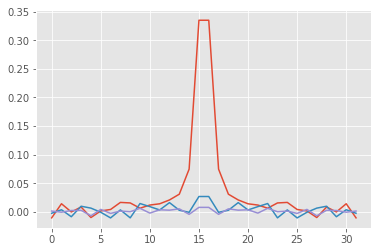

In [60]:
evecskspace = zeros((b.NwG4,b.Nc),dtype='complex')
evecsrspace = zeros((b.NwG4,b.Nc),dtype='complex')

evecskspace = b.evecs[:,:,0]
plotrspace = zeros((b.Nc,3),dtype='double')

for i in range (b.Nc):
    plotrspace[i,0] = Rvecs[i,0]
    plotrspace[i,1] = Rvecs[i,1]
    for k in range (b.Nc):
        evecsrspace[:,i] += (1 / sqrt(b.Nc)) * evecskspace[:,k] * exp(-1.0 * 1j * (Kvecs[k,0] * Rvecs[i,0] + Kvecs[k,1] * Rvecs[i,1]))

mpl.plot(evecsrspace[:,1])
mpl.plot(-evecsrspace[:,2])
mpl.plot(-evecsrspace[:,8])
Rvecs

In [47]:
gk = cos(b.Kvecs[:,0]) - cos(b.Kvecs[:,1]) # dwave form factor
r1 = dot(gk,b.evecs[int(b.NwG4/2),:,0])
gk2 = cos(2*b.Kvecs[:,0]) - cos(2*b.Kvecs[:,1]) # dwave form factor
r2 = dot(gk2,b.evecs[int(b.NwG4/2),:,0])

In [48]:
r1

(-2.462451898924226-6.418921553411495e-22j)

In [49]:
r2

(0.27677225058200783+9.26442286059391e-23j)

In [7]:
b.Kvecs[0,0]

NameError: name 'b' is not defined